In [786]:
import string
import pandas as pd
import sidetable as stb

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from pandas_profiling import ProfileReport

from bs4 import BeautifulSoup

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import RandomizedSearchCV

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import f1_score,precision_score,recall_score,hamming_loss,jaccard_score, f1_score

In [787]:
df = pd.read_csv('../QueryResults.csv')
df["Tags"] = df["Tags"].str.lstrip('<').str.replace('<', ' ').str.replace('>', '')
df.head()

Title  \
0  Android Studio : "Could not get unknown proper...   
1  How to mock history.push with the new React Ro...   
2             C#: Converting List of Chars to String   
3  Implementing efficient audit trail of record c...   
4  How to change the number of rows in the textar...   

                                                Body  \
0  <p>I am a newbie with Android Studio. I am try...   
1  <p>I am trying to mock <code>history.push</cod...   
2  <p>I'm solving a coding challenge on Coderbyte...   
3  <p>I have a quite common design problem: I nee...   
4  <p>I have a textarea with 5 lines. I want to s...   

                                                Tags        Id  Score  \
0  java android android-studio gradle android-gra...  40420705      6   
1  reactjs react-router jestjs react-router-dom r...  58524183     53   
2                                          c# string  58524222     14   
3  python performance google-app-engine audit exp...   4417130      6   
4           javascript jquery textarea jquery-events   4417161     21   

   ViewCount  FavoriteCount  AnswerCount  
0      51645            0.0            3  
1      60110            0.0            3  
2      30960            NaN            1  
3       2075            0.0            1  
4      32115            0.0            3

In [788]:
df["tag_count"] = df["Tags"].apply(lambda text: len(str(text).split(" ")))
df.head()

Title  \
0  Android Studio : "Could not get unknown proper...   
1  How to mock history.push with the new React Ro...   
2             C#: Converting List of Chars to String   
3  Implementing efficient audit trail of record c...   
4  How to change the number of rows in the textar...   

                                                Body  \
0  <p>I am a newbie with Android Studio. I am try...   
1  <p>I am trying to mock <code>history.push</cod...   
2  <p>I'm solving a coding challenge on Coderbyte...   
3  <p>I have a quite common design problem: I nee...   
4  <p>I have a textarea with 5 lines. I want to s...   

                                                Tags        Id  Score  \
0  java android android-studio gradle android-gra...  40420705      6   
1  reactjs react-router jestjs react-router-dom r...  58524183     53   
2                                          c# string  58524222     14   
3  python performance google-app-engine audit exp...   4417130      6   
4           javascript jquery textarea jquery-events   4417161     21   

   ViewCount  FavoriteCount  AnswerCount  tag_count  
0      51645            0.0            3          5  
1      60110            0.0            3          5  
2      30960            NaN            1          2  
3       2075            0.0            1          5  
4      32115            0.0            3          4

In [789]:
# plt.figure(figsize=(20,5))
# sns.countplot(df["tag_count"].value_counts())
# plt.xlabel('questions')
# plt.ylabel("no.of tags per movie")
# plt.show()

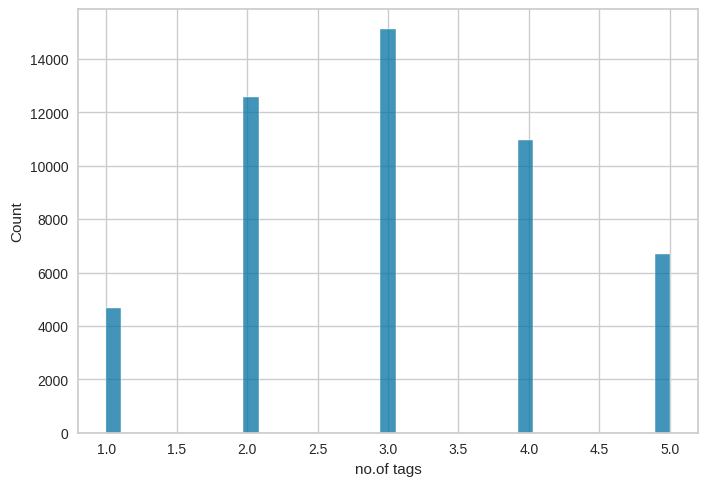

In [790]:
sns.histplot(df["tag_count"])
# plt.ylabel('no. of  ')
plt.xlabel('no.of tags')
plt.show()

In [791]:
df["tag_count"].value_counts()

3    15110
2    12559
4    10972
5     6689
1     4670
Name: tag_count, dtype: int64

In [792]:
vectorizer = CountVectorizer(preprocessor=lambda x: x,tokenizer = lambda x: str(x).split(" ") )
tag_vect = vectorizer.fit_transform(df["Tags"])
print("Number of data points :", tag_vect.shape[0])
print("Number of unique tags :", tag_vect.shape[1])

Number of data points : 50000
Number of unique tags : 12989


/home/happy-gargarin/Desktop/ocr/projet_5/venv/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [793]:
tags = vectorizer.get_feature_names_out()
print("unique tags: \n", tags[:])
tags

unique tags: 
 ['.app' '.class-file' '.emf' ... 'zurb-foundation' 'zurb-joyride' 'zxing']


array(['.app', '.class-file', '.emf', ..., 'zurb-foundation',
       'zurb-joyride', 'zxing'], dtype=object)

In [794]:
#zipping tags and tags_count into one list
freqs = tag_vect.sum(axis=0).A1
result = list(zip(tags, freqs))

print((result))

[('.app', 1), ('.class-file', 1), ('.emf', 1), ('.htaccess', 58), ('.htpasswd', 2), ('.net', 2603), ('.net-1.1', 1), ('.net-2.0', 49), ('.net-3.0', 2), ('.net-3.5', 84), ('.net-4.0', 22), ('.net-4.0-beta-2', 1), ('.net-4.5', 13), ('.net-4.6', 1), ('.net-4.6.1', 1), ('.net-4.7.2', 1), ('.net-5', 2), ('.net-6.0', 1), ('.net-assembly', 11), ('.net-attributes', 2), ('.net-core', 78), ('.net-core-3.0', 3), ('.net-core-rc2', 4), ('.net-micro-framework', 1), ('.net-native', 1), ('.net-reflector', 1), ('.net-services', 1), ('.net-standard', 2), ('.refresh', 1), ('16-bit', 3), ('256color', 1), ('2d', 18), ('2d-games', 3), ('3-tier', 1), ('32-bit', 11), ('32bit-64bit', 11), ('360-panorama-viewer', 1), ('3d', 52), ('3d-modelling', 1), ('3d-rendering', 2), ('3nf', 1), ('4d-database', 1), ('64-bit', 65), ('68000', 1), ('7zip', 6), ('8-bit', 1), ('8051', 1), ('960.gs', 1), ('a-star', 6), ('aac', 1), ('aapt', 4), ('aapt2', 1), ('aar', 2), ('ab-testing', 1), ('abac', 1), ('abaddressbook', 1), ('abap',

In [795]:
tag_counts = pd.DataFrame(result,columns=['tag','tag_counts'])
tag_counts.head()

tag  tag_counts
0         .app           1
1  .class-file           1
2         .emf           1
3    .htaccess          58
4    .htpasswd           2

In [796]:
tag_counts['tag_counts'].describe()

count    12989.000000
mean        11.736931
std         98.125506
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       5353.000000
Name: tag_counts, dtype: float64

In [797]:
tag_counts[tag_counts['tag_counts'] > 100]

tag  tag_counts
5                     .net        2603
231                   ajax         292
254              algorithm         565
320    amazon-web-services         187
341                android        1872
...                    ...         ...
12605             winforms         389
12684                  wpf         743
12745                 xaml         185
12759                xcode         362
12812                  xml         459

[209 rows x 2 columns]

In [798]:
from collections import Counter
cnt = Counter()
for text in df["Tags"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)

[('c#', 5353),
 ('java', 4403),
 ('python', 3840),
 ('javascript', 3315),
 ('c++', 2832),
 ('.net', 2603),
 ('android', 1872),
 ('php', 1826),
 ('html', 1531),
 ('jquery', 1393)]

In [799]:
def text_to_lower(text):
    return [w.lower() for w in text]


def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

def remove_html_tags(col):
    return [BeautifulSoup(rmv_tag, "lxml").text for rmv_tag in col] # html.parser is less robust

def word_lemmatizer(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    return [wordnet_lemmatizer.lemmatize(word, pos="v") for word in text]


def remove_stopwords_nltk(text):
    return [w for w in text if w not in stopwords.words("english")]

In [800]:
def remove_stops(text, stops):
    # text = re.sub(r"AC\/\d{1,4}\/\d{1,4}", "", text)
    wordnet_lemmatizer = WordNetLemmatizer()
    words = text.split()
    final = []
    for word in words:
        if word not in stops:
            word = wordnet_lemmatizer.lemmatize(word, pos="v")
            final.append(word)
    final = " ".join(final)
    final = final.translate(str.maketrans("", "", string.punctuation))
    # final = "".join([i for i in final if not i.isdigit()])
    final = "".join([i for i in final])
    while "  " in final:
        final = final.replace("  ", " ")
    return final

def clean_docs(docs):
    stops = stopwords.words("english")
    final = []
    for doc in docs:
        clean_doc = remove_stops(doc, stops)
        final.append(clean_doc)
    return final

In [801]:
df['CleanTitle'] = df['Title'].apply(lambda x : text_to_lower(x))
# df['CleanTitle'] = df['Title'].apply(lambda x : remove_punctuation(x))
# # df['CleanTitle'] = df['Title'].apply(lambda x : remove_html_tags(x))
# df['CleanTitle'] = df['Title'].apply(lambda x : remove_stopwords_nltk(x))
# df['CleanTitle'] = df['Title'].apply(lambda x : word_lemmatizer(x))

In [802]:
df['CleanTitle'] = clean_docs(df['Title'])

In [803]:
df

Title  \
0      Android Studio : "Could not get unknown proper...   
1      How to mock history.push with the new React Ro...   
2                 C#: Converting List of Chars to String   
3      Implementing efficient audit trail of record c...   
4      How to change the number of rows in the textar...   
...                                                  ...   
49995  How to ensure there is trailing directory sepa...   
49996  Visualize Jenkins pipeline or multibranch pipe...   
49997              How to Update JSONArray value on java   
49998     AngularJS: route provider changes "/" into %2F   
49999                              How does CDN DNS Work   

                                                    Body  \
0      <p>I am a newbie with Android Studio. I am try...   
1      <p>I am trying to mock <code>history.push</cod...   
2      <p>I'm solving a coding challenge on Coderbyte...   
3      <p>I have a quite common design problem: I nee...   
4      <p>I have a textarea with 5 lines. I want to s...   
...                                                  ...   
49995  <p>I'm having an issue with <code>AppDomain.Cu...   
49996  <ul>\n<li>I have one <a href="https://jenkins....   
49997  <p>can anyone help me, i'am new on java progra...   
49998  <p>I am building an AngularJS appplication and...   
49999  <p>Recently, I saw I introduction on CDN at</p...   

                                                    Tags        Id  Score  \
0      java android android-studio gradle android-gra...  40420705      6   
1      reactjs react-router jestjs react-router-dom r...  58524183     53   
2                                              c# string  58524222     14   
3      python performance google-app-engine audit exp...   4417130      6   
4               javascript jquery textarea jquery-events   4417161     21   
...                                                  ...       ...    ...   
49995                                       c# .net path  20405965     58   
49996                     jenkins build jenkins-pipeline  38913295      8   
49997                                        java arrays  38913318      8   
49998               javascript asp.net angularjs routing  38913371      8   
49999                                         networking   2103753      9   

       ViewCount  FavoriteCount  AnswerCount  tag_count  \
0          51645            0.0            3          5   
1          60110            0.0            3          5   
2          30960            NaN            1          2   
3           2075            0.0            1          5   
4          32115            0.0            3          4   
...          ...            ...          ...        ...   
49995      52358            0.0            6          3   
49996       1385            0.0            2          3   
49997      32864            0.0            4          2   
49998      10190            0.0            4          4   
49999      17878            0.0            2          1   

                                              CleanTitle  
0      Android Studio Could get unknown property VERS...  
1      How mock historypush new React Router Hooks us...  
2                         C Converting List Chars String  
3      Implementing efficient audit trail record chan...  
4              How change number row textarea use jQuery  
...                                                  ...  
49995         How ensure trail directory separator paths  
49996  Visualize Jenkins pipeline multibranch pipelin...  
49997                    How Update JSONArray value java  
49998                 AngularJS route provider change 2F  
49999                                   How CDN DNS Work  

[50000 rows x 10 columns]

In [804]:
train, test= train_test_split(
    df, test_size=0.25, random_state=42
)


In [805]:
vectorizer = CountVectorizer(preprocessor=lambda x: x,tokenizer = lambda x: str(x).split(" ") )
train_tag_vect = vectorizer.fit_transform(train["Tags"])

print("Number of data points :", train_tag_vect.shape[0])
print("Number of unique tags :", train_tag_vect.shape[1])

tags = vectorizer.get_feature_names_out()

#zipping tags and tags_count into one list
freqs = train_tag_vect.sum(axis=0).A1
result = list(zip(tags, freqs))

# print((result))

Number of data points : 37500
Number of unique tags : 11397


/home/happy-gargarin/Desktop/ocr/projet_5/venv/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [806]:
import numpy as np

In [807]:
def tags_to_choose(n):
    t = train_tag_vect.sum(axis=0).tolist()[0]
    sorted_tags_i = sorted(range(len(t)), key=lambda i: t[i], reverse=True)
    multilabel_yn=train_tag_vect[:,sorted_tags_i[:n]]
    return multilabel_yn

def questions_explained_fn(n):
    multilabel_yn = tags_to_choose(n)
    x= multilabel_yn.sum(axis=1)
    return (np.count_nonzero(x==0))

questions_explained = []
total_tags=train_tag_vect.shape[1]
total_qs=df.shape[0]
for i in range(total_tags):
    questions_explained.append(np.round(((total_qs-questions_explained_fn(i))/total_qs)*100,3))

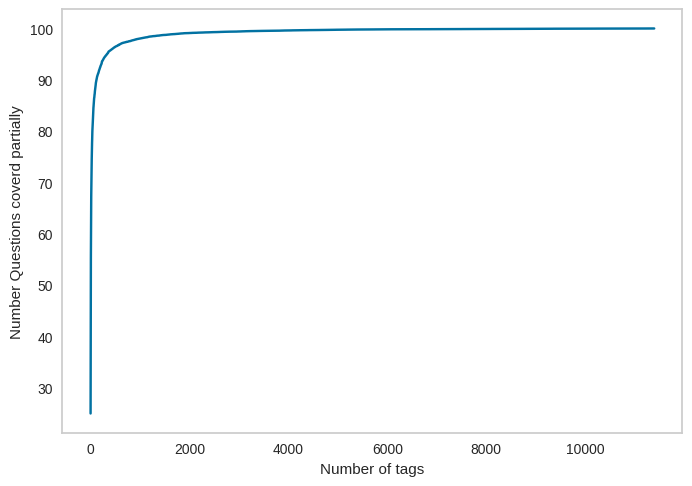

with  5 tags we are covering  53.95 % of questions
with  10 tags we are covering  62.67 % of questions
with  18 tags we are covering  71.124 % of questions
with  20 tags we are covering  72.658 % of questions
with  26 tags we are covering  76.084 % of questions
with  30 tags we are covering  77.774 % of questions
with  35 tags we are covering  79.548 % of questions
with  40 tags we are covering  80.912 % of questions
with  50 tags we are covering  83.218 % of questions
with  60 tags we are covering  84.836 % of questions
with  100 tags we are covering  88.606 % of questions
with  150 tags we are covering  91.176 % of questions


In [808]:
fig, ax = plt.subplots()
ax.plot(questions_explained)
plt.xlabel("Number of tags")
plt.ylabel("Number Questions coverd partially")
plt.grid()
plt.show()

print("with ",5,"tags we are covering ",questions_explained[5],"% of questions")
print("with ",10,"tags we are covering ",questions_explained[10],"% of questions")
print("with ",18,"tags we are covering ",questions_explained[18],"% of questions")
print("with ",20,"tags we are covering ",questions_explained[20],"% of questions")
print("with ",26,"tags we are covering ",questions_explained[26],"% of questions")
print("with ",30,"tags we are covering ",questions_explained[30],"% of questions")
print("with ",35,"tags we are covering ",questions_explained[35],"% of questions")
print("with ",40,"tags we are covering ",questions_explained[40],"% of questions")
print("with ",50,"tags we are covering ",questions_explained[50],"% of questions")
print("with ",60,"tags we are covering ",questions_explained[60],"% of questions")
print("with ",100,"tags we are covering ",questions_explained[100],"% of questions")
print("with ",150,"tags we are covering ",questions_explained[150],"% of questions")

In [809]:
vectorizer = CountVectorizer(preprocessor=lambda x: x,tokenizer = lambda x: str(x).split(" ") )
test_tag_vect = vectorizer.fit_transform(test["Tags"])

print("Number of data points :", test_tag_vect.shape[0])
print("Number of unique tags :", test_tag_vect.shape[1])

tags = vectorizer.get_feature_names_out()

#zipping tags and tags_count into one list
freqs = test_tag_vect.sum(axis=0).A1
result = list(zip(tags, freqs))

# print((result))

Number of data points : 12500
Number of unique tags : 6483


In [810]:
def tags_to_choose(n):
    t = test_tag_vect.sum(axis=0).tolist()[0]
    sorted_tags_i = sorted(range(len(t)), key=lambda i: t[i], reverse=True)
    multilabel_yn=test_tag_vect[:,sorted_tags_i[:n]]
    return multilabel_yn

def questions_explained_fn(n):
    multilabel_yn = tags_to_choose(n)
    x= multilabel_yn.sum(axis=1)
    return (np.count_nonzero(x==0))

questions_explained = []
total_tags=test_tag_vect.shape[1]
total_qs=df.shape[0]
for i in range(total_tags):
    questions_explained.append(np.round(((total_qs-questions_explained_fn(i))/total_qs)*100,3))

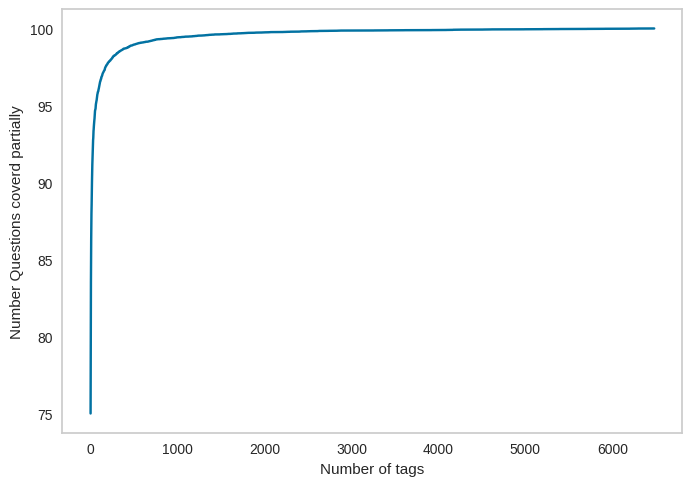

with  5 tags we are covering  84.862 % of questions
with  10 tags we are covering  87.974 % of questions
with  18 tags we are covering  90.614 % of questions
with  20 tags we are covering  91.164 % of questions
with  26 tags we are covering  92.146 % of questions
with  30 tags we are covering  92.816 % of questions
with  35 tags we are covering  93.402 % of questions
with  40 tags we are covering  93.812 % of questions
with  50 tags we are covering  94.526 % of questions
with  60 tags we are covering  95.036 % of questions


In [811]:
fig, ax = plt.subplots()
ax.plot(questions_explained)
plt.xlabel("Number of tags")
plt.ylabel("Number Questions coverd partially")
plt.grid()
plt.show()

print("with ",5,"tags we are covering ",questions_explained[5],"% of questions")
print("with ",10,"tags we are covering ",questions_explained[10],"% of questions")
print("with ",18,"tags we are covering ",questions_explained[18],"% of questions")
print("with ",20,"tags we are covering ",questions_explained[20],"% of questions")
print("with ",26,"tags we are covering ",questions_explained[26],"% of questions")
print("with ",30,"tags we are covering ",questions_explained[30],"% of questions")
print("with ",35,"tags we are covering ",questions_explained[35],"% of questions")
print("with ",40,"tags we are covering ",questions_explained[40],"% of questions")
print("with ",50,"tags we are covering ",questions_explained[50],"% of questions")
print("with ",60,"tags we are covering ",questions_explained[60],"% of questions")

In [812]:
vectorizer = CountVectorizer(preprocessor=lambda x: x, tokenizer = lambda x: str(x).split(" ") )
tag_vect = vectorizer.fit_transform(df["Tags"])

In [813]:
tags = vectorizer.get_feature_names_out()
freqs = tag_vect.sum(axis=0).A1
result = list(zip(tags, freqs))

In [814]:
tag_counts = pd.DataFrame(result,columns=['tag','tag_counts'])

In [815]:
tag_counts

tag  tag_counts
0                 .app           1
1          .class-file           1
2                 .emf           1
3            .htaccess          58
4            .htpasswd           2
...                ...         ...
12984              zsi           1
12985             zune           1
12986  zurb-foundation           7
12987     zurb-joyride           1
12988            zxing           3

[12989 rows x 2 columns]

In [816]:
tag_counts.sort_values(['tag_counts'], ascending=False)[:50]

tag  tag_counts
1623               c#        5353
5793             java        4403
8973           python        3840
5846       javascript        3315
1635              c++        2832
5                .net        2603
341           android        1872
8414              php        1826
5133             html        1531
5984           jquery        1393
1622                c        1307
10653             sql        1234
915           asp.net        1201
5642              ios        1159
2511              css        1132
5677           iphone         952
10667      sql-server         931
7339            mysql         891
7833      objective-c         883
9770    ruby-on-rails         783
12548         windows         752
9762             ruby         752
12684             wpf         743
6483            linux         728
940       asp.net-mvc         698
3093           django         650
4499              git         634
8345      performance         615
12244   visual-studio         606
10913          string         569
254         algorithm         565
2683         database         544
9154                r         540
7311   multithreading         531
890            arrays         526
7592          node.js         504
11925    unit-testing         495
9432            regex         492
12812             xml         459
6051             json         435
6671            macos         409
3423          eclipse         407
12605        winforms         389
11100           swift         383
9322          reactjs         366
12759           xcode         362
1274             bash         351
587           angular         349
2827        debugging         347
10582          spring         347

In [817]:
tag_counts_sorted = tag_counts.sort_values(['tag_counts'], ascending=False)
tag_counts = tag_counts_sorted['tag'].head(200)

In [818]:
tag_counts_sorted

tag  tag_counts
1623                   c#        5353
5793                 java        4403
8973               python        3840
5846           javascript        3315
1635                  c++        2832
...                   ...         ...
6004            jquery-on           1
6002         jquery-hover           1
6001         jquery-gmap3           1
6000  jquery-forms-plugin           1
6494      list-comparison           1

[12989 rows x 2 columns]

In [819]:
tag_counts

1623                     c#
5793                   java
8973                 python
5846             javascript
1635                    c++
                ...        
10293           silverlight
971                assembly
3828                     f#
4368     garbage-collection
9965              scripting
Name: tag, Length: 200, dtype: object

In [820]:
tags_150 = list(tag_counts)

In [821]:
tags_150

['c#',
 'java',
 'python',
 'javascript',
 'c++',
 '.net',
 'android',
 'php',
 'html',
 'jquery',
 'c',
 'sql',
 'asp.net',
 'ios',
 'css',
 'iphone',
 'sql-server',
 'mysql',
 'objective-c',
 'ruby-on-rails',
 'windows',
 'ruby',
 'wpf',
 'linux',
 'asp.net-mvc',
 'django',
 'git',
 'performance',
 'visual-studio',
 'string',
 'algorithm',
 'database',
 'r',
 'multithreading',
 'arrays',
 'node.js',
 'unit-testing',
 'regex',
 'xml',
 'json',
 'macos',
 'eclipse',
 'winforms',
 'swift',
 'reactjs',
 'xcode',
 'bash',
 'angular',
 'debugging',
 'spring',
 'perl',
 'angularjs',
 'cocoa-touch',
 'linq',
 'svn',
 'scala',
 'cocoa',
 'postgresql',
 'oop',
 'language-agnostic',
 'ajax',
 'oracle',
 'tsql',
 'security',
 'list',
 'visual-studio-2008',
 'python-3.x',
 'user-interface',
 'vb.net',
 'typescript',
 'delphi',
 'ios7',
 'shell',
 'http',
 'image',
 'vim',
 'generics',
 'exception',
 'pandas',
 'datetime',
 'wcf',
 'version-control',
 'firebase',
 'sql-server-2005',
 'file',
 'mat

In [822]:
len(tags_150)

200

In [823]:
#Deleting Every Tags other than TOP 30 Tags
# data['tags'] = ""
from tqdm import tqdm
for le in tqdm(range(df.shape[0])):
    a = []
    b = df['Tags'][le].split(" ")
    # c = ''
    # print(b)
    for i in range(len(b)):
        for j in tags_150:
            temp = b[i].strip()  #Stripping the white-spaces present(if any) around the tag
            # print(1, temp)
            if temp == j:
                # print(2, j)
                a.append(j)


    if a:
        df['Tags'][le] = " ".join(a)
        # print(a)
    else:
        df['Tags'][le] = np.nan

df['Tags']

  0%|          | 0/50000 [00:00<?, ?it/s]/tmp/ipykernel_15706/3281780423.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tags'][le] = " ".join(a)
/tmp/ipykernel_15706/3281780423.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tags'][le] = np.nan
100%|██████████| 50000/50000 [00:20<00:00, 2430.73it/s]


0          java android android-studio gradle
1                                     reactjs
2                                   c# string
3        python performance google-app-engine
4                           javascript jquery
                         ...                 
49995                                 c# .net
49996                                     NaN
49997                             java arrays
49998            javascript asp.net angularjs
49999                              networking
Name: Tags, Length: 50000, dtype: object

In [824]:
data = df.dropna()
data.shape

(40335, 10)

In [825]:
vectorizer = CountVectorizer(preprocessor=lambda x: x, tokenizer = lambda x: str(x).split(" "))
tag_vect = vectorizer.fit_transform(data["Tags"])

/home/happy-gargarin/Desktop/ocr/projet_5/venv/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [826]:
data

Title  \
0      Android Studio : "Could not get unknown proper...   
1      How to mock history.push with the new React Ro...   
3      Implementing efficient audit trail of record c...   
4      How to change the number of rows in the textar...   
5                    Firebase 401 unauthorized error FCM   
...                                                  ...   
49994  What are the security differences between cook...   
49995  How to ensure there is trailing directory sepa...   
49997              How to Update JSONArray value on java   
49998     AngularJS: route provider changes "/" into %2F   
49999                              How does CDN DNS Work   

                                                    Body  \
0      <p>I am a newbie with Android Studio. I am try...   
1      <p>I am trying to mock <code>history.push</cod...   
3      <p>I have a quite common design problem: I nee...   
4      <p>I have a textarea with 5 lines. I want to s...   
5      <p>I'm trying to test out Firebase Cloud messa...   
...                                                  ...   
49994  <p>When we create a cookie we can specify wher...   
49995  <p>I'm having an issue with <code>AppDomain.Cu...   
49997  <p>can anyone help me, i'am new on java progra...   
49998  <p>I am building an AngularJS appplication and...   
49999  <p>Recently, I saw I introduction on CDN at</p...   

                                       Tags        Id  Score  ViewCount  \
0        java android android-studio gradle  40420705      6      51645   
1                                   reactjs  58524183     53      60110   
3      python performance google-app-engine   4417130      6       2075   
4                         javascript jquery   4417161     21      32115   
5                                   android  37633188     77     115365   
...                                     ...       ...    ...        ...   
49994                              security  57090774     15       4888   
49995                               c# .net  20405965     58      52358   
49997                           java arrays  38913318      8      32864   
49998          javascript asp.net angularjs  38913371      8      10190   
49999                            networking   2103753      9      17878   

       FavoriteCount  AnswerCount  tag_count  \
0                0.0            3          5   
1                0.0            3          5   
3                0.0            1          5   
4                0.0            3          4   
5                0.0           10          2   
...              ...          ...        ...   
49994            0.0            1          3   
49995            0.0            6          3   
49997            0.0            4          2   
49998            0.0            4          4   
49999            0.0            2          1   

                                              CleanTitle  
0      Android Studio Could get unknown property VERS...  
1      How mock historypush new React Router Hooks us...  
3      Implementing efficient audit trail record chan...  
4              How change number row textarea use jQuery  
5                    Firebase 401 unauthorized error FCM  
...                                                  ...  
49994  What security differences cookies Domain vs Sa...  
49995         How ensure trail directory separator paths  
49997                    How Update JSONArray value java  
49998                 AngularJS route provider change 2F  
49999                                   How CDN DNS Work  

[40335 rows x 10 columns]

In [827]:
#importing MultiLabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
#instantiating MultiLabelBinarizer
mlb = MultiLabelBinarizer()

In [828]:
data["Tags"]

0          java android android-studio gradle
1                                     reactjs
3        python performance google-app-engine
4                           javascript jquery
5                                     android
                         ...                 
49994                                security
49995                                 c# .net
49997                             java arrays
49998            javascript asp.net angularjs
49999                              networking
Name: Tags, Length: 40335, dtype: object

In [829]:
X = data["CleanTitle"]
y = mlb.fit_transform(data["Tags"].apply(lambda x: x.split(" ")))
X_train, X_test, y_train, y_test= train_test_split(
    X, y, test_size=0.25, random_state=42
)

# tf_vectorizer = TfidfVectorizer(min_df=0.09, tokenizer = lambda x: x.split(" "), ngram_range=(1,1))
tf_vectorizer = TfidfVectorizer()

X_train = tf_vectorizer.fit_transform(X_train)
X_test = tf_vectorizer.transform(X_test)

In [830]:
print(y_train.shape, y_test.shape)

(30251, 200) (10084, 200)


In [831]:
mlb.classes_

array(['.net', 'ajax', 'algorithm', 'amazon-web-services', 'android',
       'android-studio', 'angular', 'angularjs', 'apache', 'api',
       'architecture', 'arrays', 'asp.net', 'asp.net-core', 'asp.net-mvc',
       'assembly', 'asynchronous', 'authentication', 'bash', 'batch-file',
       'browser', 'c', 'c#', 'c++', 'c++11', 'caching', 'class', 'cocoa',
       'cocoa-touch', 'coding-style', 'collections', 'command-line',
       'compiler-construction', 'concurrency', 'configuration', 'css',
       'dart', 'data-structures', 'database', 'database-design', 'date',
       'datetime', 'debugging', 'delphi', 'design-patterns', 'dictionary',
       'django', 'docker', 'dom', 'eclipse', 'emacs', 'email',
       'entity-framework', 'enums', 'events', 'excel', 'exception',
       'exception-handling', 'f#', 'file', 'firebase', 'firefox',
       'flutter', 'forms', 'function', 'functional-programming',
       'garbage-collection', 'gcc', 'generics', 'git', 'github', 'go',
       'google-app-

In [832]:
t = mlb.inverse_transform(y)
t

[('android', 'android-studio', 'gradle', 'java'),
 ('reactjs',),
 ('google-app-engine', 'performance', 'python'),
 ('javascript', 'jquery'),
 ('android',),
 ('gradle',),
 ('c', 'c++', 'caching'),
 ('database', 'django', 'postgresql'),
 ('twitter-bootstrap',),
 ('c#',),
 ('linq',),
 ('json',),
 ('asp.net', 'rest', 'web-services'),
 ('android', 'networking'),
 ('ajax', 'javascript', 'jquery'),
 ('asp.net', 'asp.net-mvc'),
 ('linux',),
 ('linux', 'ubuntu'),
 ('jquery',),
 ('shell',),
 ('c++', 'multithreading'),
 ('javascript', 'jquery'),
 ('java',),
 ('c',),
 ('django', 'python', 'python-3.x'),
 ('date', 'mysql'),
 ('android', 'rest'),
 ('ruby',),
 ('.net', 'debugging'),
 ('tomcat',),
 ('.net', 'c#'),
 ('c#', 'visual-studio-2008'),
 ('html', 'jquery'),
 ('c++', 'optimization'),
 ('iphone',),
 ('java',),
 ('angular',),
 ('configuration',),
 ('collections', 'generics', 'java'),
 ('java',),
 ('tsql',),
 ('svn', 'vb.net'),
 ('file', 'java'),
 ('algorithm', 'sorting'),
 ('unix', 'windows'),
 (

In [833]:
#cnt_vectorizer = CountVectorizer(binary=True, max_features = 50).fit(y_train)
#y_train_multilabel = cnt_vectorizer.transform(y_train)
#y_test_multilabel = cnt_vectorizer.transform(y_test)
#print("Dimensions of data Y_train_multilabel:",y_train_multilabel.shape,"Y_test_multilabel:",y_test_multilabel.shape)

In [834]:
sgl = SGDClassifier(loss='log_loss', class_weight='balanced')

clf = OneVsRestClassifier(sgl)
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SGDClassifier(class_weight='balanced',
                                            loss='log_loss'))

In [835]:
prediction1 = clf.predict(X_test)

precision1 = round(precision_score(y_test, prediction1, average='micro'), 3)

recall1 = round(recall_score(y_test, prediction1, average='micro'), 3)
jaccard1 = round(jaccard_score(y_test, prediction1, average='micro'), 3)
f1_score1 = round(2*((precision1 * recall1)/(precision1 + recall1)), 3)
f1 = f1_score(y_test, prediction1, average=None)
print(f1)
# print("precision1: {:.4f}, recall1: {:.4f}, F1-measure: {:.4f}".format(precision1, recall1, f1_score1))
print(f"1 precision: {precision1}, recall: {recall1}, jaccard_score : {jaccard1}, F1-measure: {f1_score1}")

[0.35174014 0.31944444 0.38444924 0.66666667 0.66309013 0.22360248
 0.58278146 0.51231527 0.32592593 0.21428571 0.08474576 0.51744186
 0.40224719 0.51612903 0.54185022 0.32183908 0.45833333 0.32624113
 0.39416058 0.32380952 0.32394366 0.2751911  0.44013623 0.38039038
 0.23148148 0.6779661  0.19083969 0.29139073 0.21079692 0.09411765
 0.12698413 0.16309013 0.1512605  0.22429907 0.15584416 0.52266667
 0.48888889 0.19393939 0.27368421 0.12648221 0.39751553 0.32512315
 0.33333333 0.52525253 0.29767442 0.48648649 0.78700361 0.78947368
 0.22093023 0.58666667 0.9047619  0.64705882 0.4        0.76190476
 0.38235294 0.72527473 0.375      0.2300885  0.09022556 0.15968064
 0.84848485 0.5974026  0.71698113 0.2739726  0.20820189 0.20253165
 0.34146341 0.3125     0.46511628 0.79775281 0.40559441 0.49206349
 0.66666667 0.66666667 0.54237288 0.5        0.528      0.67368421
 0.44752819 0.26190476 0.18320611 0.33333333 0.40930233 0.29885057
 0.25       0.6969697  0.47826087 0.46419098 0.44102564 0.5131

In [836]:
# for i in range(5):
#     k = X_test.sample(1).index[0]
#     print("Movie: ", X_test[k])
#     print("Actual genre: ",y_test[k])
#     print("Predicted tag: ", cnt_vectorizer.inverse_transform(prediction1[k])[0],"\n")

In [837]:
sgh = SGDClassifier(loss='hinge', class_weight='balanced')

clf = OneVsRestClassifier(sgh)
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SGDClassifier(class_weight='balanced'))

In [838]:
prediction2 = clf.predict(X_test)

precision2 = precision_score(y_test, prediction2, average='micro')

recall2 = recall_score(y_test, prediction2, average='micro')

f1_score2 = 2*((precision2 * recall2)/(precision2 + recall2))

print("precision2: {:.4f}, recall2: {:.4f}, F1-measure: {:.4f}".format(precision2, recall2, f1_score2))

precision2: 0.2973, recall2: 0.6880, F1-measure: 0.4152


In [839]:
lr = LogisticRegression(class_weight='balanced')

clf = OneVsRestClassifier(lr)
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(class_weight='balanced'))

In [840]:
prediction3 = clf.predict(X_test)

precision3 = precision_score(y_test, prediction3, average='micro')

recall3 = recall_score(y_test, prediction3, average='micro')

f1_score3 = 2*((precision3 * recall3)/(precision3 + recall3))

print("precision3: {:.4f}, recall3: {:.4f}, F1-measure: {:.4f}".format(precision3, recall3, f1_score3))

precision3: 0.3393, recall3: 0.6740, F1-measure: 0.4514


In [841]:
from prettytable import PrettyTable

tabel = PrettyTable()

tabel.field_names=['Model', 'Vectorizer', 'Precision','recall','f1_score']


tabel.add_row(['SGDClassifier(log)', 'AVG W2V',  round(precision1, 3), round(recall1, 3), round(f1_score1, 3)])

tabel.add_row(['SGDClassifier(hinge)','AVG W2V', round(precision2, 3),  round(recall2, 3), round(f1_score2, 3)])

tabel.add_row(['LogisticRegression','AVG W2V', round(precision3, 3), round(recall3, 3), round(f1_score3, 3)])


print(tabel)

+----------------------+------------+-----------+--------+----------+
|        Model         | Vectorizer | Precision | recall | f1_score |
+----------------------+------------+-----------+--------+----------+
|  SGDClassifier(log)  |  AVG W2V   |   0.299   | 0.691  |  0.417   |
| SGDClassifier(hinge) |  AVG W2V   |   0.297   | 0.688  |  0.415   |
|  LogisticRegression  |  AVG W2V   |   0.339   | 0.674  |  0.451   |
+----------------------+------------+-----------+--------+----------+
